# **Linear Regression**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/linear_regression_dataset.csv")

In [ ]:
df #dataframede featurelar ve valuelar arasında noktalı virgül bulunmaktadır.
   #bundan kurtulmak için data yüklenirken sep methodu kullanılır.
   #eğer seperator methoduna değer yazılmazsa default olarak virgülleri ayırır.
   #ancak bu datada noktalı virgüller bulunduğu için sep=";" yazmak gereklidir.

,deneyim;maas
0,0.5;2500
1,0;2250
2,1;2750
3,5;8000
4,8;9000
5,4;6900
6,15;20000
7,7;8500
8,3;6000
9,2;3500


In [ ]:
df = pd.read_csv("linear_regression_dataset.csv", sep=";")

In [ ]:
df.head()  #dataframedeki featurelar ve valuelar birbirinden ayrılmıştır.

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


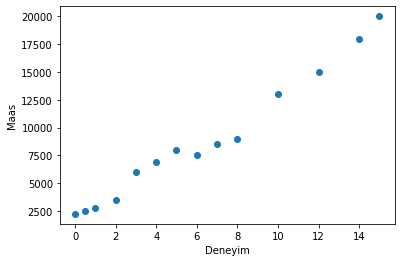

In [ ]:
plt.scatter(df.deneyim,df.maas) #x ve y koordinatlarına hangi sütunların geleceği belirlenir.
plt.xlabel("Deneyim") #x ekseninin adı atanır
plt.ylabel("Maas")    #y ekseninin adı atanır.
plt.show()   


Plot incelendiğinde x ekseni deneyim, y ekseni maaştır.

Deneyim arttıkça maaşın da artacağı, aralarında bir doğru orantı olduğu anlaşılır.

9 yıl deneyimi olan birinin maaşının yaklaşık olarak 11000 olacağı anlaşılır. İnsan zihni bu iki feature arasında görünmez bir line olduğunu düşünür ve hesaplamaları da bu line'a göre yapar.

Bu hesaplamayı makinenin yapabilmesi için noktalar arasına bir line'ın fit edilmesi lazımdır. Böylelikle bir model oluşturulmuş olur. (fit a line to dataset observations)

Daha sonra fit edilen line istenilen değeri predict etmekte kullanılır.

Bu methodun adına "**line fit**" ya da "**linear regression**" methodu denir.

**b0(constant)(bias)** = Line'ın y eksenini kestiği yer ve regresyon sabitidir.

**b1(coefficient)** = Line'ın eğimi veya regresyon katsayısıdır.

**y = b0 + b1*x** -> linear regression'ın matematiksel formülüdür.

**y -> bağımlı değişken**

**x-> bağımsız değişken** 

Bağımsız değişken ile bağımlı değişken tahmin edilmeye çalışılır.


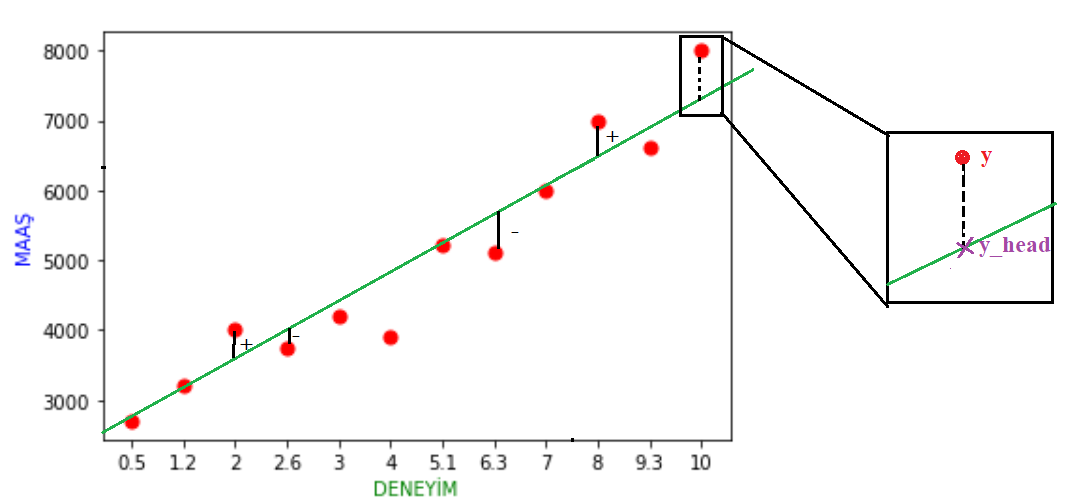

Line çizerken amaç tüm noktalara en yakın şekilde geçmesidir. Plot incelediğinde line bazı noktaların tam üzerinden geçerken bazı noktalara uzak kalmıştır. Bu noktaları tahmin edebilmek için ilk olarak **residual** hesaplanır. Residual gerçek y değeri ve tahmin edilen değer arasındaki farktır. Başka bir deyişle tahmin yaparken yapılan hata olarak da açıklanabilir.

**residual** = y - y_head

**y_head** -> predict edilen değerdir.

**y** -> gözlemlenen değer

Plota bakıldığında bazı residual değerlerinin eksi, bazılarının artı çıktığı görülür. Hepsi toplandığında birbirlerini götürecekler ve hiç hata yokmuş gibi gözükecektir.Bunun önüne geçmek için residual değerlerinin kareleri alınır ve toplama işlemi gerçekleştirilir.

**sum(residual^2)**

Son olarak bu toplam formülü n'e bölünür. Buradaki n değeri plottaki noktaların toplam sayısıdır. 

**sum((y-y_head)^2)/n -> MSE(Mean Squared Error)**

Linear Regression'da bir line'ı fit etmek için kullanılan yöntem MSE(Mean Squared Error)'dır.

Modeli oluştururken amaç MSE değerini düşük tutmaktır. Çünkü MSE değeri ne kadar düşük çıkarsa modeldeki hata oranı o kadar azdır ve doğru bir tahmin gerçekleştirildiği anlamına gelir.

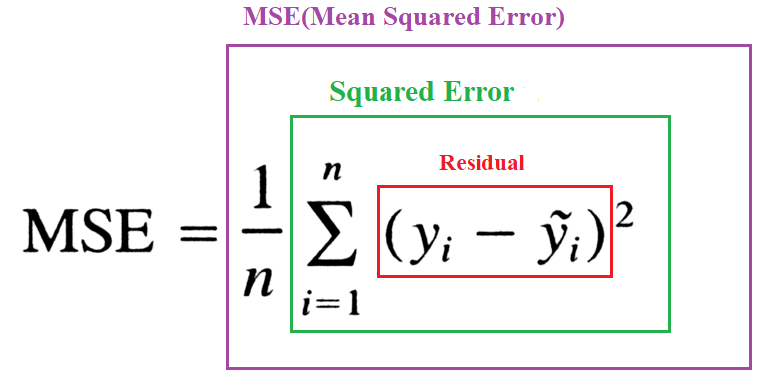

MSE'yi düşük tutabilmek için y = b0 + b1*x formülündeki en uygun b0 ve b1 değerleri bulunmalıdır. Çünkü bu formülden çıkan y değeri residual hesaplanırken kullanırken y değeridir.

In [ ]:
#line'ı fit edebilmek için x ve y eksenlerine ihtiyaç vardır.
x = df.deneyim.values               #deneyim ve maas featureları pandas türünde bir seridir.
                                    #values methoduyla numpy türünde bir array'e çevrilir.

In [ ]:
x.shape #bu feature 14 satır 1 sütundan oluşmaktadır.
        #Ancak sklearn (14,1) görmek ister.
        #bunun için reshape(-1,1) yazılırsa tüm satırların 1 sütundan oluştuğu belirtilmiş olur.

(14,)

In [ ]:
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
#sklearn kütüphanesinin içinde machine learning modelleri bulunur.

linear_reg = LinearRegression() #LinearRegression modeli linear_reg adlı variable'a eşitlenir.
linear_reg.fit(x,y)             #line fit edilir.


LinearRegression()

In [ ]:
#prediction
import numpy as np

b0 = linear_reg.predict([[0]]) #fit edilen line'ın b0 değişkenine yani y eksenini kestiği noktaya bakılır.
print("b0: ",b0)               #y eksenine kestiği noktada x değeri 0 olacağından y=b0'dır.

b0:  [[1663.89519747]]


In [ ]:
b0_ = linear_reg.intercept_    #ayrıca b0 değeri değeri intercept methoduyla da bulunur.
print("b0: ",b0_)   

b0:  [1663.89519747]


In [ ]:
b1 = linear_reg.coef_  #b1'in diğer adı coefficient'tır. coef methoduyla b1 değeri bulunur.
print("b1: ",b1)   

b1:  [[1138.34819698]]


bo ve b1 değeri bulunduktan sonra;

y=bo+b1*x formülünden

y=1663+1138*x formülüne sahip olunur. Burada y maaş, x deneyimdir.

maas=1663+1138*deneyim -> fit edilen linear regression'ın denklemidir.

Bu denklem ile deneyim (bağımsız değişken) ile maas (bağımlı değişken) predict edilir.

In [ ]:
new_salary = 1663 + 1138*11 #11 yıllık deneyimi olan birinin maaşı linear regression denklemine göre hesaplanmıştır.
print(new_salary)

14181


In [ ]:
b11 = linear_reg.predict([[11]])  #11 yıllık deneyimi olan birinin maaşı predict methoduyla bulunur.
print("b11: ",b11)

b11:  [[14185.72536421]]


fit edilen line görselleştirilir.

In [ ]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [ ]:
array.shape #oluşturulan array'in 1 sütundan oluştuğunu sklearn'ün anlaması için reshape edilmesi gerekir.

(16,)

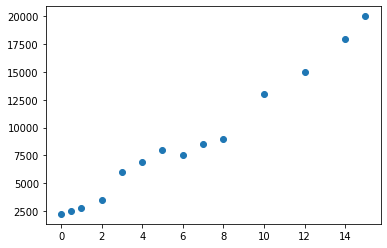

In [ ]:
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  #deneyim sütunu
plt.scatter(x,y)
plt.show()

In [ ]:
y_head = linear_reg.predict(array) #tahmin edilen maaş değerleridir.

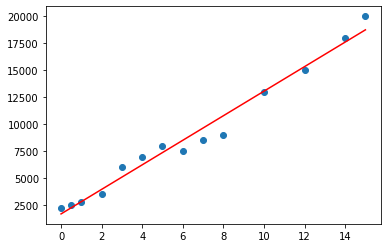

In [ ]:
plt.plot(array, y_head, color="red")
plt.scatter(x,y)
plt.show()